In [1]:
# import os

# # Đường dẫn đến thư mục chứa các tệp ảnh
# folder_path = "C:/Users/ACER\HTTM-02/DataCollection/TuongTu"

# # Lấy danh sách các tệp trong thư mục
# file_list = os.listdir(folder_path)

# # Lặp qua từng tệp và đổi tên
# for index, filename in enumerate(file_list):
#     # Tạo tên mới với "that_tinh_" + chỉ mục
#     new_filename = f"tuong_tu_{index}{os.path.splitext(filename)[-1]}"
    
#     # new_filename = f"hello_{index}{os.path.splitext(filename)[-1]}"

#     # Đường dẫn tệp cũ và mới
#     old_filepath = os.path.join(folder_path, filename)
#     new_filepath = os.path.join(folder_path, new_filename)

#     # Đổi tên tệp
#     os.rename(old_filepath, new_filepath)

# print("Đã đổi tên các tệp ảnh thành công!")


In [1]:
import os
import shutil
from pathlib import Path
from PIL import Image

# -------------------------------Tạo các tệp cân thiết ---------------------------------------------------------
#kiểm tra đầu vào có thư mục đó chưa
def check_folder_exist(folder_path):
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)

# Đường dẫn đến thư mục nơi bộ dữ liệu gốc đã được giải nén
original_dataset_dir = Path('C:/Users/ACER\HTTM-02/DataCollection/Original')
# Đường dẫn đến thư mục nơi bộ dữ liệu đã qua xử lý
processed_dataset_dir = Path('C:/Users/ACER\HTTM-02/DataCollection/Processed')
check_folder_exist(processed_dataset_dir)
# Đường dẫn đến thư mục nơi bộ dữ liệu dùng để huấn luyện, xác thực và kiểm tra
base_dir = Path('C:/Users/ACER\HTTM-02/DataCollection/Base')
check_folder_exist(base_dir)

processed_loving_dir = os.path.join(processed_dataset_dir, 'DangYeu')
check_folder_exist(processed_loving_dir)
processed_lovelorn_dir = os.path.join(processed_dataset_dir, 'ThatTinh')
check_folder_exist(processed_lovelorn_dir)
processed_lovesick_dir = os.path.join(processed_dataset_dir, 'TuongTu')
check_folder_exist(processed_lovesick_dir)

# ------------------------------------------------------------------------------------------------------
#Hàm này thực hiện việc chuyển đổi hình ảnh từ định dạng khác (như PNG) sang định dạng JPG.
def convert_images_to_jpg(input_folder, output_folder):
    # Lặp qua tất cả tệp trong thư mục đầu vào
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Kiểm tra nếu tệp là hình ảnh
        if os.path.isfile(input_path) or any(input_path.lower().endswith(ext) for ext in ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp')):
            # Đọc và chuyển đổi hình ảnh thành định dạng JPG
            try:
                image = Image.open(input_path)
                if image.mode == 'RGBA' or image.mode == 'P':
                    image = image.convert('RGB')
                output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.jpg')
                image.save(output_path, 'JPEG')
            except Exception as e:
                os.remove(input_path)
                print(f"Lỗi khi chuyển đổi {input_path}: {str(e)}")

# Định nghĩa các thư mục nguồn cho mỗi loại hình ảnh
source_loving_dir = os.path.join(original_dataset_dir, 'DangYeu')
source_lovelorn_dir = os.path.join(original_dataset_dir, 'ThatTinh')
source_lovesick_dir = os.path.join(original_dataset_dir, 'TuongTu')

convert_images_to_jpg(source_loving_dir, processed_loving_dir)
convert_images_to_jpg(source_lovelorn_dir, processed_lovelorn_dir)
convert_images_to_jpg(source_lovesick_dir, processed_lovesick_dir)
print("Convert done!")


Convert done!


Found 2178 files belonging to 3 classes.
Using 1743 files for training.
Using 435 files for validation.
Found 2178 files belonging to 3 classes.
Epoch 1/100
55/55 [==============================] - 11s 130ms/step - loss: 9.6463 - accuracy: 0.4452 - val_loss: 0.9347 - val_accuracy: 0.5862
Epoch 2/100
55/55 [==============================] - 7s 121ms/step - loss: 0.7668 - accuracy: 0.6655 - val_loss: 0.6882 - val_accuracy: 0.6805
Epoch 3/100
55/55 [==============================] - 7s 120ms/step - loss: 0.5125 - accuracy: 0.7912 - val_loss: 0.5317 - val_accuracy: 0.8115
Epoch 4/100
55/55 [==============================] - 6s 117ms/step - loss: 0.3339 - accuracy: 0.8692 - val_loss: 0.4043 - val_accuracy: 0.8897
Epoch 5/100
55/55 [==============================] - 6s 117ms/step - loss: 0.2193 - accuracy: 0.9208 - val_loss: 0.3321 - val_accuracy: 0.9218
Epoch 6/100
55/55 [==============================] - 6s 117ms/step - loss: 0.1299 - accuracy: 0.9598 - val_loss: 0.3487 - val_accuracy: 0.9

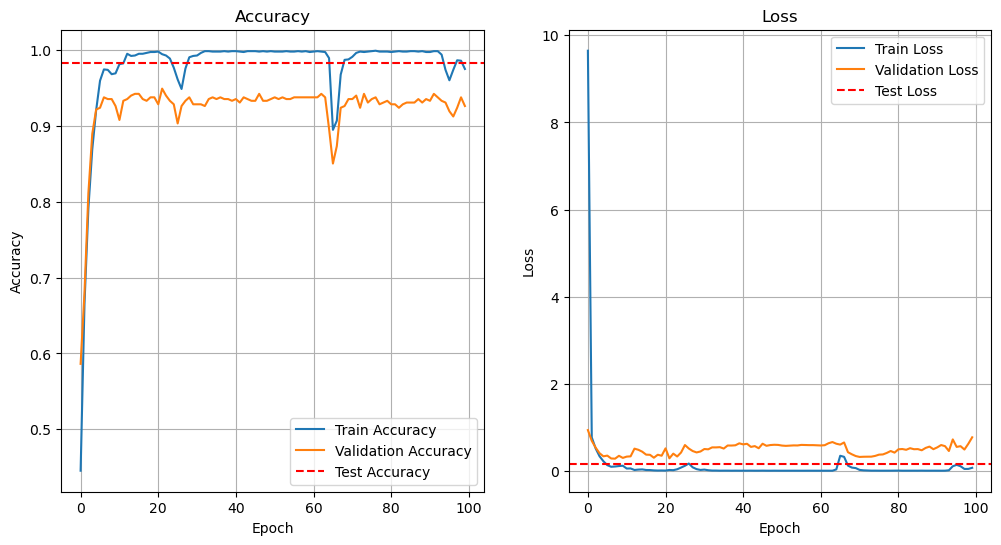

Test loss: 0.16154882311820984
Test accuracy: 0.9830119609832764


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Rescaling, RandomFlip, RandomRotation, RandomZoom, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

# Load dữ liệu training và validation
train_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
    processed_dataset_dir,
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    subset='both',
    seed=123
)

#Tối ưu hóa dữ liệu đầu vào
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Đánh giá mô hình trên tập dữ liệu test
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    processed_dataset_dir,
    image_size=(64, 64),
    batch_size=4,
)

data_augmentation = Sequential([
    RandomFlip("horizontal", input_shape=(64, 64, 3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

# Tạo mô hình
model_1 = Sequential()
# model_1.add(data_augmentation)
model_1.add(Conv2D(32, 3, padding="same", activation='relu'))
model_1.add(MaxPooling2D(padding="same"))
model_1.add(Conv2D(64, 3, padding="same", activation='relu'))
model_1.add(MaxPooling2D(padding="same"))
model_1.add(Conv2D(128, 3, padding="same", activation='relu'))
model_1.add(MaxPooling2D(padding="same"))
model_1.add(Flatten())
model_1.add(Dropout(0.2))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

# Compile mô hình
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Đào tạo mô hình
history = model_1.fit(train_dataset, epochs=100, validation_data=validation_dataset)

# Lấy thông tin accuracy và loss của tập kiểm tra
test_loss, test_accuracy = model_1.evaluate(test_dataset)

# Tạo biểu đồ so sánh
plt.figure(figsize=(12, 6))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
